# Recheche d'information TME
## Da JU

In [42]:
# import dependency
%matplotlib inline
from Index import *
from QueryParser import *
from evaluation.EvalMeasure import *
from models.IRmodel import  *
from models.Weighter import  *
from models.LanguageModel import *
from models.Okapi import  *
import numpy as np
from evaluation.GridSearch import *
from models.RandomModel import *
from collection.PageRank import *
from collection.Hits import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from pylab import *
def printf(format, *args):
    sys.stdout.write(format % args)

## Load test query set and corpus
The queries will be sorted in irlist. 

In [26]:
index = Index("text")
index.indexation('cacm/cacm.txt', './test/')
parser = QueryParser()
parser.initFile('cacm/cacm.qry', 'cacm/cacm.rel')
irlists = []
query = parser.nextQuery()
while query != None:
    irlists.append(IRList(query))
    query = parser.nextQuery()

In [27]:
index.getTfsForDoc(1)

{'algebra': 1,
 'intern': 1,
 'languag': 1,
 'perli': 1,
 'preliminari': 1,
 'report': 1,
 'samelson': 1}

The index is working normally as expected.

## Weighters
As described in the suject, 5 types of weighterVector are implemnted.
* weighter1  $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = 1 \ si \  t\in q, 0 \ if \ not $
* weighter2  $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = tf_{t, q}$
* weighter3 $w_{t, d} = tf_{t,d}\ and \ w_{t,q} = idf_{t} \ si \ t\in q, 0 \ if \ not $
* weighter4  $w_{t, d} = 1 \ + log(tf_{t,d}) \ if \ t\in d \ 0 \ if \ not \ and \ w_{t,q} = idf_{t} \ si \ t\in q, 0 \ if \ not $
* wighter5  $w_{t, d} = (1 \ + log(tf_{t,d})) \times idf_{t} \ if \ t\in d \ 0 \ if \ not \ and \ w_{t,q} = (1 \ + log(tf_{t})) \times idf_{t} \ si \ t\in q, 0 \ if \ not $

In [28]:
weighter1 = WeighterVector1(index)
weighter2 = WeighterVector2(index)
weighter3 = WeighterVector3(index)
weighter4 = WeighterVector4(index)
weighter5 = WeighterVector5(index)

In [29]:
print (weighter1.getDocWeightsForDoc(1))
print (weighter1.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1, 'ibm': 1, 'deal': 1, 'share': 1, 'articl': 1, 'exist': 1, 'operat': 1, 'time': 1, 'tss': 1}


In [30]:
print (weighter2.getDocWeightsForDoc(1))
print (weighter2.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1, 'ibm': 1, 'deal': 1, 'share': 1, 'articl': 1, 'exist': 1, 'operat': 1, 'time': 1, 'tss': 1}


In [31]:
print (weighter3.getDocWeightsForDoc(1))
print (weighter3.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1, 'algebra': 1, 'preliminari': 1, 'perli': 1, 'intern': 1, 'report': 1, 'languag': 1}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


In [32]:
print (weighter4.getDocWeightsForDoc(1))
print (weighter4.getWeightsForQuery(irlists[0].query.text))

{'samelson': 1.0, 'algebra': 1.0, 'preliminari': 1.0, 'perli': 1.0, 'intern': 1.0, 'report': 1.0, 'languag': 1.0}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


In [33]:
print (weighter5.getDocWeightsForDoc(1))
print (weighter5.getWeightsForQuery(irlists[0].query.text))

{'samelson': 3.9660845914055547, 'algebra': 3.6538426614881265, 'preliminari': 3.8576378639472444, 'perli': 4.037546953962178, 'intern': 3.7943729704892277, 'report': 3.607094402296647, 'languag': 2.638803262023985}
{'comput': 1.5051910286733308, 'ibm': 3.6239190249380058, 'deal': 3.872640027286491, 'share': 3.4009223334185297, 'articl': 4.004123952424728, 'exist': 3.494515133706941, 'operat': 5.048862267190013, 'time': 2.2350305888409556, 'tss': 4.13668014598143}


## Vector model
The vector model is based on a weighter and can perfrom the research. we take a model based on weighter 1 for exemple.

In [10]:
model = IRmodelVector(weighter1)
result = model.getRanking(irlists[0].query.text)
result[0]

(1938, 17)

# Precision-recall
We use the famous Precision-recall method to evaluate our model based on 5 weighters. We draw 10 points for the first query as an exemple.

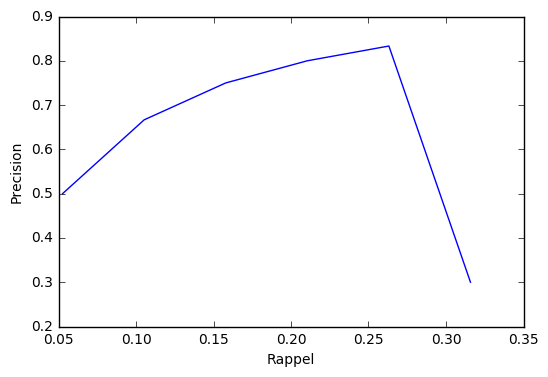

In [11]:
irlists[10].list = model.getRanking(irlists[10].query.text)
rater = PresitionRappel(20)
scores = rater.eval(irlists[10])
scores = sorted(scores.items(), key=operator.itemgetter(0))
recall = [x[0] for x in scores]
pre = [x[1] for x in scores]
plt.plot(recall, pre)
plt.xlabel("Rappel")
plt.ylabel("Precision")

In [12]:
rater = AP(20)
printf("The AP of model with query 10 is : %f", rater.eval(irlists[10]))

The AP of model with query 10 is : 0.258271

## Evaluation plateform
In this section, we use ap as mesure. we will mesure the performance of five different weighters with vector model

In [34]:
models = []
models.append(IRmodelVector(weighter1))
models.append(IRmodelVector(weighter2))
models.append(IRmodelVector(weighter3))
models.append(IRmodelVector(weighter4))
models.append(IRmodelVector(weighter5))
eval = EvalIRModel(models, irlists, 10)
scores_mean_1, scores_std_1 = eval.evalModels()

In [37]:
scores_std_1

[0.14064478206308048,
 0.13981133036677854,
 0.16250619090854626,
 0.16853807204363594,
 0.1684738274879671]

(0.04, 0.12)

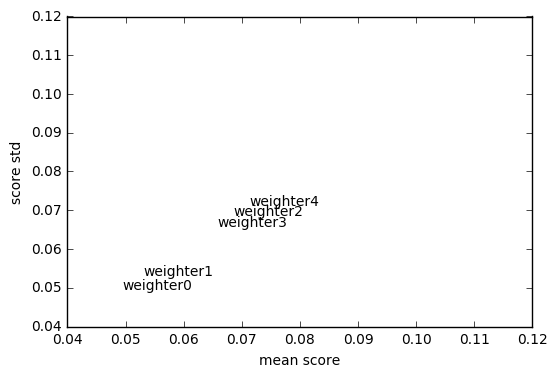

In [49]:
txt = 'weighter'
fig, ax = plt.subplots()
for i in range(5):
    ax.annotate(txt + str(i), (scores_mean_1[i],scores_mean_1[i]))
plt.xlabel('mean score')
plt.ylabel('score std')
ylim([0.04, 0.12])
xlim([0.04, 0.12])

We can see, each time the model gets better.

## Language model & Okapi
for each model, we will perfrom a grid search in order to find the optimum. These models will combine with weighter1.


In [17]:
models = []
models.append(LanguageModel(weighter1, 0.1))
models.append(Okapi(weighter1, 1.5 ,0.75))
eval = EvalIRModel(models, irlists, 20)
scores_mean, scores_std = eval.evalModels()

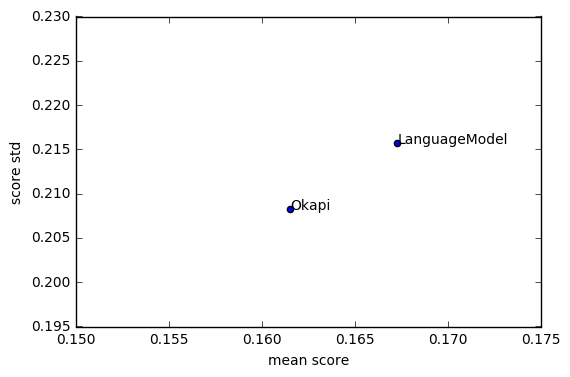

In [22]:
n = ['LanguageModel', 'Okapi']
fig, ax = plt.subplots()
for i, txt in enumerate(n):
    ax.annotate(txt, (scores_mean[i],scores_std[i]))
plt.scatter(scores_mean, scores_std)
plt.xlabel('mean score')
plt.ylabel('score std')

### Grid Search
for lam from 0 - 0.99 in language model

In [18]:
models = []
lams = np.linspace(0, 0.99, 10)
for lam in lams:
    models.append(LanguageModel(weighter1, lam))
search = GridSearch(models, irlists, 10)
print (search.optimisation())

0.33


The best parameter is lambda = 0.33

In [52]:
models = []
bs = np.linspace(0, 0.99, 5)
k1s = np.linspace(1.01, 1.99, 5)
for b in bs:
    for k1 in k1s:
        models.append(Okapi(weighter1, b ,k1))
search = GridSearch(models, irlists, 10)
print (search.optimisation())

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S32') dtype('S32') dtype('S32')